<a href="https://colab.research.google.com/github/swathipraveen/Python_practice/blob/Python/EDA_1_Latest_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [1]:
#!pip install pandas_profiling
#!pip install sweetviz

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the libraries
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#import sweetviz as sv

In [4]:
data1 = pd.read_csv("/content/data_clean.csv")

In [5]:
data1.tail(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
148,149,30.0,193.0,6.9,70,9,26,2010,70,C
149,150,NaN,145.0,13.2,77,9,27,2010,77,PS
150,151,14.0,191.0,14.3,75,9,28,2010,75,S
151,152,18.0,131.0,8.0,76,9,29,2010,76,PS
152,153,20.0,223.0,11.5,68,9,30,2010,68,S
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [6]:
#Data Structure 
type(data1)



pandas.core.frame.DataFrame

In [7]:
data1.shape

(158, 10)

In [8]:
#data types
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

# Data type conversion

In [9]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [10]:
data1.isna().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [11]:
data2=data1.iloc[:,1:]

In [12]:
data2.head(2)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C


In [13]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=data2.copy()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [15]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')    

#data['Wind']=data['Wind'].astype('int64')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


# Duplicates

In [17]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [18]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [19]:
#Count of duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [20]:
data[~data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [21]:
data_cleaned1=data.drop_duplicates()

In [22]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [23]:
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [24]:
data_cleaned2=data_cleaned1.drop(10,axis=0)
data_cleaned2=data_cleaned1.drop("Temp C",axis=1)

In [25]:
data_cleaned2.head(12)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
6,23.0,299.0,8.6,5.0,7,2010,65,PS
7,19.0,99.0,13.8,5.0,8,2010,59,C
8,8.0,19.0,20.1,5.0,9,2010,61,PS
9,NaN,194.0,8.6,5.0,10,2010,69,S


# Rename the columns

In [26]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [27]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [28]:
data_cleaned3.head(12)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
6,23.0,299.0,8.6,5.0,7,2010,65,PS
7,19.0,99.0,13.8,5.0,8,2010,59,C
8,8.0,19.0,20.1,5.0,9,2010,61,PS
9,NaN,194.0,8.6,5.0,10,2010,69,S


# Outlier Detection

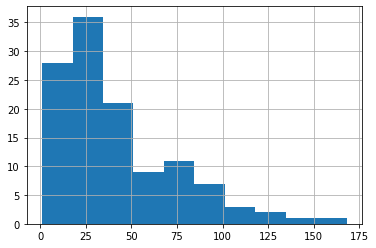

In [29]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

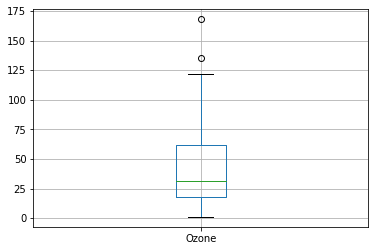

In [30]:
#Box plot
data_cleaned3.boxplot(column=['Ozone'])

In [31]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [32]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


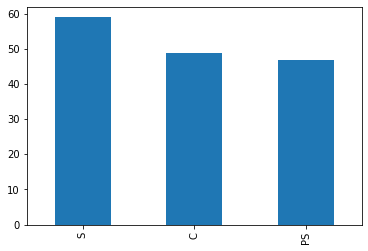

In [33]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

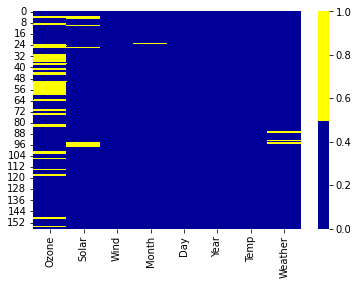

In [34]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [35]:
data_cleaned3.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4       True
       ...  
152    False
153    False
154    False
155     True
157    False
Length: 157, dtype: bool

In [36]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C
24,NaN,66.0,16.6,5.0,25,2010,57,PS
25,NaN,266.0,14.9,5.0,26,2010,58,C
26,NaN,NaN,8.0,5.0,27,2010,57,PS
31,NaN,286.0,8.6,6.0,1,2010,78,S
32,NaN,287.0,9.7,6.0,2,2010,74,C


In [37]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [38]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
mean

41.81512605042017

In [39]:
for i in data_cleaned3.columns:
    try:
        mean=data_cleaned3[i].mean()
        data_cleaned3[i]=data_cleaned3[i].fillna(mean)
    except:
        pass

In [40]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [41]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S


In [42]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [43]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [44]:
data["Weather"].mode()

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [45]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna("S")

In [46]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [47]:
data_cleaned3.shape

(157, 8)

In [48]:
obj_columns.shape

(157, 1)

In [49]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [50]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

# Scatter plot and Correlation analysis

In [51]:
data_cleaned3.columns



Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

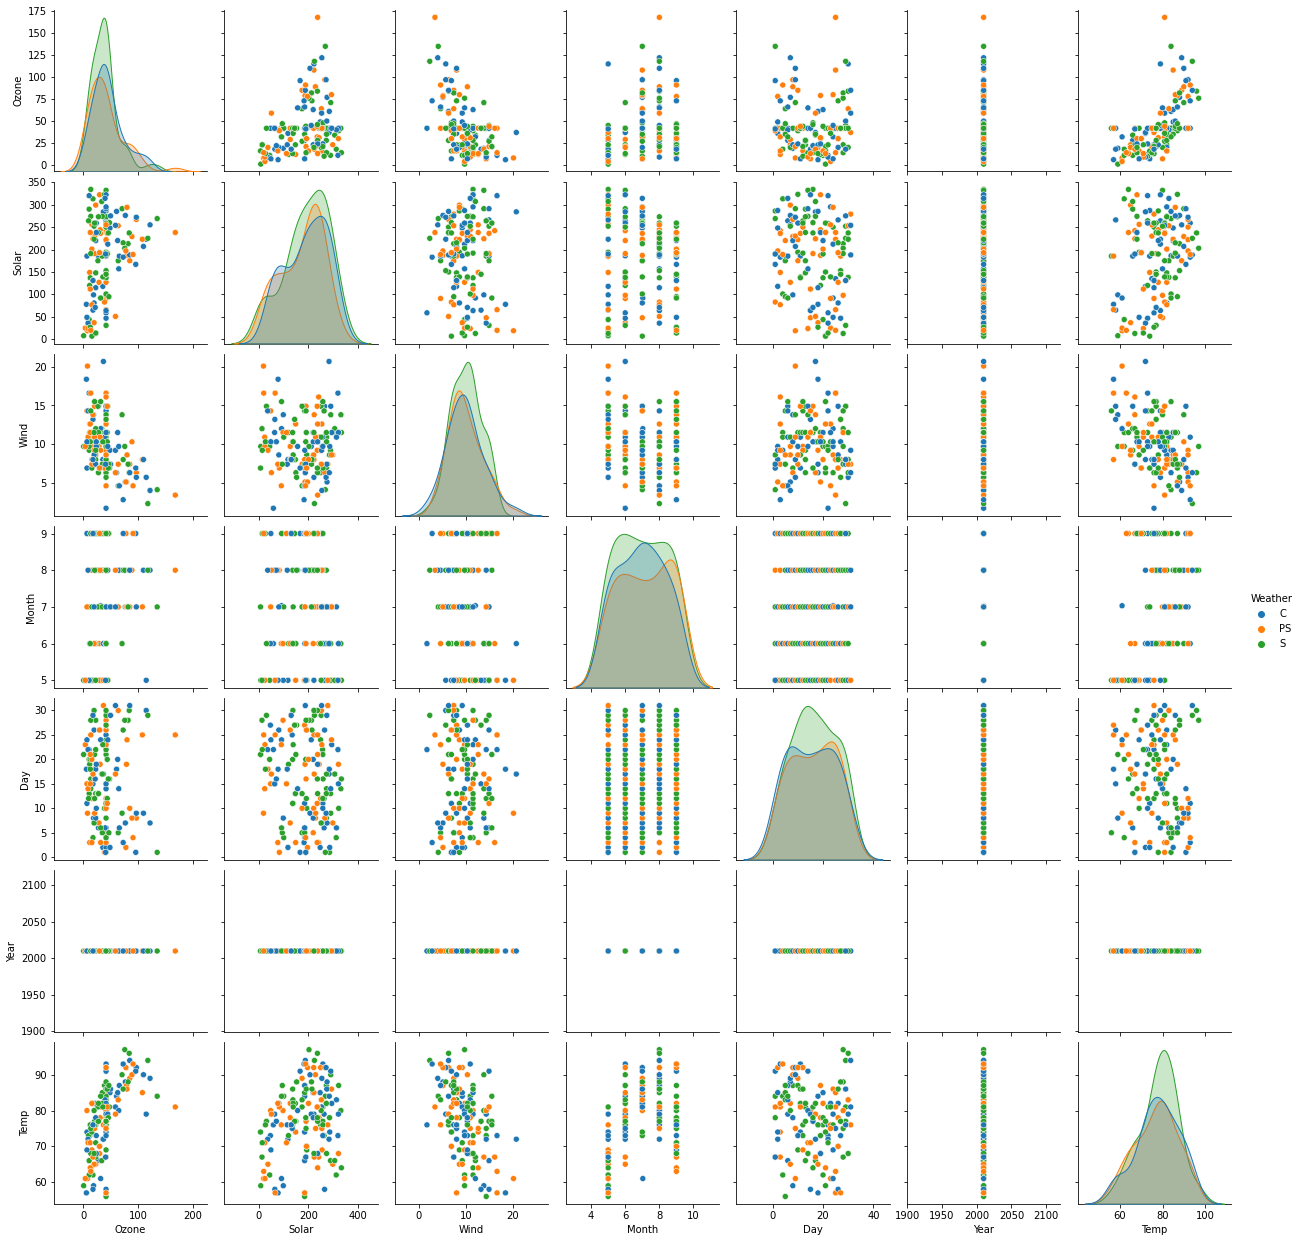

In [52]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3,hue="Weather")


In [53]:
#Correlation
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.132809,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.090564,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.166029,0.029900,NaN,-0.441228
Month,0.132809,-0.090564,-0.166029,1.000000,0.049924,NaN,0.394420
Day,-0.021916,-0.151007,0.029900,0.049924,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.394420,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [54]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [55]:
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [56]:
data_cleaned4=data_cleaned4.dropna()



#### Normalization of the data

In [57]:
import sklearn
sklearn.__version__

'1.0.1'

In [58]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [60]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [61]:
array = data_cleaned3.values

scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24 0.55 0.66 0.   0.13]]


In [62]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [63]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


# Speed up the EDA process

In [ ]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')


Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
